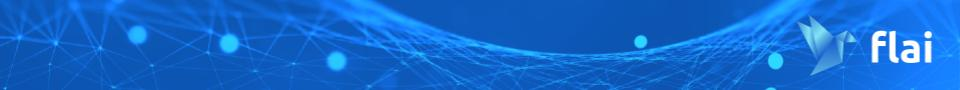

# **Aula 4 - Spark MLlib para ajudar modelo de Classificação com PySpark**

Avaliar risco é uma tarefa de extrema importância, principalmente para as empresas da área de seguros, como por exemplo, os planos de saúde 🤝. Conhecer os conceitos e a diversidade de previsões na área de seguro 🏥 e as implementações nos mais diversos frameworks é de extrema importância para o Cientista de dados 👨🏽‍💻.

Vamos utilizar um conjunto de dados que foi extraído do repositório do livro de Machine Learning do Brett Lantz, e que está disponível no kaggle. Este dataset possui as seguintes variáveis: Idade do beneficiário principal (age), Sexo do contratante do seguro (sex)👩👨, IMC - Índice de Massa Corporal (bmi) 💪, Número de filhos cobertos pelo seguro saúde (children) 👨‍👩‍👧‍👦, Se é fumante (smoker) 🔥, Região de residência do beneficiário (region) 🗺️ e Custos médicos individuais faturados pelo seguro de saúde (charges) 💰.

Nesta aula vamos utilizar modelos de machine learning para a tarefa de classificação, com o objetivo de prever se determinado beneficiário do plano de saúde é fumante, baseado nas demais informações cadastrais disponíveis no conjunto de dados. 

## **Preparando o ambiente para utilizar o PySpark**

### **Instalando o Java**

O Apache Spark depende de outros sistemas, portanto, antes do Spark é preciso instalar as dependências. Primeiro, deve-se instalar o java

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

### **Instalando o Apache Spark**

Em seguida, é preciso fazer o download do Spark, e, também, do hadoop, pois o Apache Spark roda sob o HDFS, em sua máquina (no caso aqui, na máquina virtual do Google Colab que você está usando.

In [ ]:
# Fazendo download
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz

# Descompactando os arquivos
!tar xf spark-3.1.2-bin-hadoop2.7.tgz

### **Configurando o ambiente**

Pronto! Agora precisamos dizer para o sistema onde encontrar o Java e o Spark, que instalamos a pouco neste ambiente.

In [ ]:
# Importando a biblioteca os
import os

# Definindo a variável de ambiente do Java
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

# Definindo a variável de ambiente do Spark
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

A seguir, vamos precisar da biblioteca findspark que vai nos permitir importar pacotes necessários para o funcionamento do pyspark



In [ ]:
# instalando a findspark
!pip install -q findspark

In [ ]:
#importando a findspark
import findspark

# iniciando o findspark
findspark.init()

## **Iniciando o PySpark**

Tudo certo até aqui? Ótimo, então agora vamos abrir um sessão Spark para poder trabalhar com este FrameWork.

In [ ]:
# importando as bibliotecas necessárias
from pyspark import *
from pyspark.sql import *
from pyspark.sql import SparkSession


In [ ]:
# iniciando o spark context
sc = SparkSession.builder.master('local[*]').getOrCreate()

# Verificando se a sessão foi criada
sc

## **Ingestão dos dados para o Apache Spark**

In [ ]:
# Permitir o Google Colab utilizar arquivos do Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
 # Carregando um conjunto de dados
seguro = (sc.read
      .format('csv')
      .option('inferSchema',True)
      .option('delimiter',',')
      .option('header',True)
      .option('encoding','UTF-8')
      .load('/content/drive/Shareddrives/Comunidade/Datasets/insurance.csv')
)

# Espiando o dataset
seguro.show()

+---+------+------+--------+------+---------+-----------+
|age|   sex|   bmi|children|smoker|   region|    charges|
+---+------+------+--------+------+---------+-----------+
| 19|female|  27.9|       0|   yes|southwest|  16884.924|
| 18|  male| 33.77|       1|    no|southeast|  1725.5523|
| 28|  male|  33.0|       3|    no|southeast|   4449.462|
| 33|  male|22.705|       0|    no|northwest|21984.47061|
| 32|  male| 28.88|       0|    no|northwest|  3866.8552|
| 31|female| 25.74|       0|    no|southeast|  3756.6216|
| 46|female| 33.44|       1|    no|southeast|  8240.5896|
| 37|female| 27.74|       3|    no|northwest|  7281.5056|
| 37|  male| 29.83|       2|    no|northeast|  6406.4107|
| 60|female| 25.84|       0|    no|northwest|28923.13692|
| 25|  male| 26.22|       0|    no|northeast|  2721.3208|
| 62|female| 26.29|       0|   yes|southeast| 27808.7251|
| 23|  male|  34.4|       0|    no|southwest|   1826.843|
| 56|female| 39.82|       0|    no|southeast| 11090.7178|
| 27|  male| 4

In [ ]:
# Verificando o Schema
seguro.printSchema()

root
 |-- age: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- bmi: double (nullable = true)
 |-- children: integer (nullable = true)
 |-- smoker: string (nullable = true)
 |-- region: string (nullable = true)
 |-- charges: double (nullable = true)



## **EDA - Análise Exploratória de Dados**


In [ ]:
# Importando os métodos com funções para transformações de variáveis
from pyspark.sql.functions import *

### **smoker**

In [ ]:
seguro.groupby('smoker').count().show()

+------+-----+
|smoker|count|
+------+-----+
|    no| 1064|
|   yes|  274|
+------+-----+



### **sex**

In [ ]:
seguro.groupby('sex').count().show()

+------+-----+
|   sex|count|
+------+-----+
|female|  662|
|  male|  676|
+------+-----+



In [ ]:
seguro.crosstab('sex', 'smoker').show()

+----------+---+---+
|sex_smoker| no|yes|
+----------+---+---+
|      male|517|159|
|    female|547|115|
+----------+---+---+



### **region**

In [ ]:
seguro.groupby('region').count().show()

+---------+-----+
|   region|count|
+---------+-----+
|northwest|  325|
|southeast|  364|
|northeast|  324|
|southwest|  325|
+---------+-----+



In [ ]:
seguro.crosstab('region', 'smoker').show()

+-------------+---+---+
|region_smoker| no|yes|
+-------------+---+---+
|    southeast|273| 91|
|    northwest|267| 58|
|    southwest|267| 58|
|    northeast|257| 67|
+-------------+---+---+



### **bmi**

In [ ]:
seguro.select('bmi').summary(
     "min", '1%','5%', '10%',"25%", "50%","75%",'90%', '95%', 
     '99%', "max",'mean', 'stddev', 'count' ).show()

+-------+------------------+
|summary|               bmi|
+-------+------------------+
|    min|             15.96|
|     1%|             17.86|
|     5%|             21.12|
|    10%|             22.99|
|    25%|             26.29|
|    50%|              30.4|
|    75%|              34.7|
|    90%|            38.665|
|    95%|             41.14|
|    99%|             46.53|
|    max|             53.13|
|   mean|30.663396860986538|
| stddev| 6.098186911679012|
|  count|              1338|
+-------+------------------+



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f71e74aac10>]],
      dtype=object)

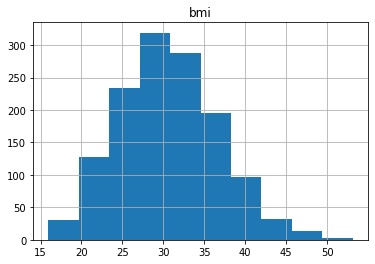

In [ ]:
# Verificando a distribuição da bmi
seguro.select('bmi').toPandas().hist()

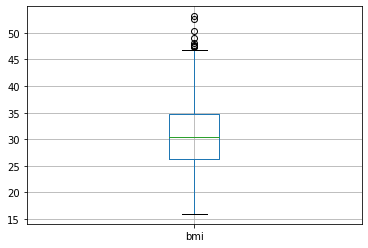

In [ ]:
seguro.select('bmi').toPandas().boxplot()

### **charges**

In [ ]:
seguro.select('charges').summary(
     "min", '1%','5%', '10%',"25%", "50%","75%",'90%', '95%', 
     '99%', "max",'mean', 'stddev', 'count' ).show()

+-------+------------------+
|summary|           charges|
+-------+------------------+
|    min|         1121.8739|
|     1%|          1252.407|
|     5%|          1748.774|
|    10%|          2331.519|
|    25%|         4738.2682|
|    50%|         9377.9047|
|    75%|       16657.71745|
|    90%|         34838.873|
|    95%|         41661.602|
|    99%|       48549.17835|
|    max|       63770.42801|
|   mean|13270.422265141257|
| stddev|12110.011236693992|
|  count|              1338|
+-------+------------------+



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f71e737cf90>]],
      dtype=object)

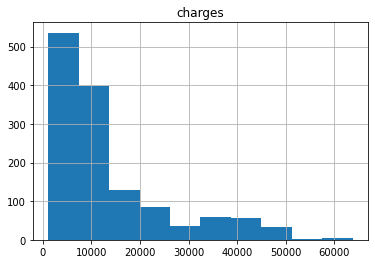

In [ ]:
# Verificando a distribuição da charges
seguro.select('charges').toPandas().hist()

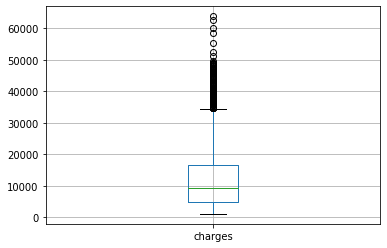

In [ ]:
seguro.select('charges').toPandas().boxplot()

### **age**

In [ ]:
seguro.select('age').summary(
     "min", '1%','5%', '10%',"25%", "50%","75%",'90%', '95%', 
     '99%', "max",'mean', 'stddev', 'count' ).show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|    min|                18|
|     1%|                18|
|     5%|                18|
|    10%|                19|
|    25%|                27|
|    50%|                39|
|    75%|                51|
|    90%|                59|
|    95%|                62|
|    99%|                64|
|    max|                64|
|   mean| 39.20702541106129|
| stddev|14.049960379216147|
|  count|              1338|
+-------+------------------+



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f71e73ca910>]],
      dtype=object)

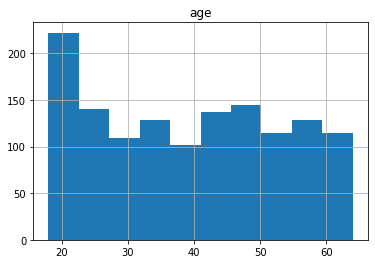

In [ ]:
# Verificando a distribuição da idade
seguro.select('age').toPandas().hist()

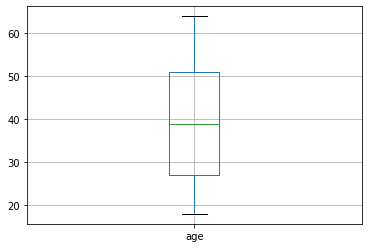

In [ ]:
seguro.select('age').toPandas().boxplot()

### **children**

In [ ]:
seguro.select('children').summary(
     "min", '1%','5%', '10%',"25%", "50%","75%",'90%', '95%', 
     '99%', "max",'mean', 'stddev', 'count' ).show()

+-------+-----------------+
|summary|         children|
+-------+-----------------+
|    min|                0|
|     1%|                0|
|     5%|                0|
|    10%|                0|
|    25%|                0|
|    50%|                1|
|    75%|                2|
|    90%|                3|
|    95%|                3|
|    99%|                5|
|    max|                5|
|   mean|  1.0949177877429|
| stddev|1.205492739781914|
|  count|             1338|
+-------+-----------------+



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f71e6c41050>]],
      dtype=object)

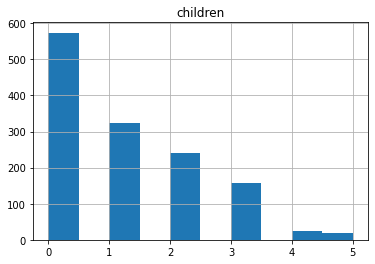

In [ ]:
# Verificando a distribuição do número de crianças
seguro.select('children').toPandas().hist()

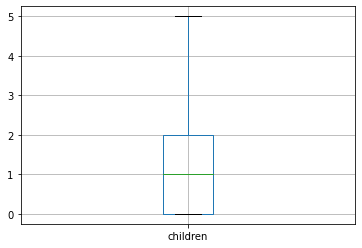

In [ ]:
seguro.select('children').toPandas().boxplot()

## **Pré-Processamento para Machine Learning**

In [ ]:
# Importando Bibliotecas e métodos necessários
import pandas as pd
from pyspark.sql.functions import *
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import StringIndexer

In [ ]:
# Definindo uma categorização
def_categorias = StringIndexer(
    inputCols=['sex','region','smoker'], 
    outputCols=['sex_dummy','region_temp','smoker_dummy'])

# Aplicando a categorização de sex
seguro_ml = def_categorias.fit(seguro).transform(seguro)

# Espiando o dataset resultante
print(seguro_ml.printSchema())
seguro_ml.show()

root
 |-- age: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- bmi: double (nullable = true)
 |-- children: integer (nullable = true)
 |-- smoker: string (nullable = true)
 |-- region: string (nullable = true)
 |-- charges: double (nullable = true)
 |-- sex_dummy: double (nullable = false)
 |-- region_temp: double (nullable = false)
 |-- smoker_dummy: double (nullable = false)

None
+---+------+------+--------+------+---------+-----------+---------+-----------+------------+
|age|   sex|   bmi|children|smoker|   region|    charges|sex_dummy|region_temp|smoker_dummy|
+---+------+------+--------+------+---------+-----------+---------+-----------+------------+
| 19|female|  27.9|       0|   yes|southwest|  16884.924|      1.0|        2.0|         1.0|
| 18|  male| 33.77|       1|    no|southeast|  1725.5523|      0.0|        0.0|         0.0|
| 28|  male|  33.0|       3|    no|southeast|   4449.462|      0.0|        0.0|         0.0|
| 33|  male|22.705|       0|    no|nor

In [ ]:
# Definindo as dummy
def_dummy = OneHotEncoder(
    inputCols=['region_temp'], 
    outputCols=['region_dummy'], 
    dropLast= True
  )

# Criando as dummy
seguro_ml = def_dummy.fit(seguro_ml).transform(seguro_ml)

# Espiando o dataset resultante
print(seguro_ml.printSchema())
seguro_ml.show()

root
 |-- age: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- bmi: double (nullable = true)
 |-- children: integer (nullable = true)
 |-- smoker: string (nullable = true)
 |-- region: string (nullable = true)
 |-- charges: double (nullable = true)
 |-- sex_dummy: double (nullable = false)
 |-- region_temp: double (nullable = false)
 |-- smoker_dummy: double (nullable = false)
 |-- region_dummy: vector (nullable = true)

None
+---+------+------+--------+------+---------+-----------+---------+-----------+------------+-------------+
|age|   sex|   bmi|children|smoker|   region|    charges|sex_dummy|region_temp|smoker_dummy| region_dummy|
+---+------+------+--------+------+---------+-----------+---------+-----------+------------+-------------+
| 19|female|  27.9|       0|   yes|southwest|  16884.924|      1.0|        2.0|         1.0|(3,[2],[1.0])|
| 18|  male| 33.77|       1|    no|southeast|  1725.5523|      0.0|        0.0|         0.0|(3,[0],[1.0])|
| 28|  male|  33.

In [ ]:
# Transformando para PandasDataFrame para visualizar elhor a estrutura
seguro_ml.toPandas().head()

,age,sex,bmi,children,smoker,region,charges,sex_dummy,region_temp,smoker_dummy,region_dummy
0,19,female,27.900,0,yes,southwest,16884.92400,1.0,2.0,1.0,"(0.0, 0.0, 1.0)"
1,18,male,33.770,1,no,southeast,1725.55230,0.0,0.0,0.0,"(1.0, 0.0, 0.0)"
2,28,male,33.000,3,no,southeast,4449.46200,0.0,0.0,0.0,"(1.0, 0.0, 0.0)"
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0,0.0,"(0.0, 1.0, 0.0)"
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0,0.0,"(0.0, 1.0, 0.0)"


In [ ]:
# criando uma coluna com todas as preditoras
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

# Definindo as preditoras
def_preditoras = VectorAssembler( 
    inputCols=[
    'age',
    'bmi',
    'children',
    'charges',               
    'sex_dummy',
    'region_dummy'
    ],
    outputCol= 'preditoras'  
)

# criando uma coluna com todas as preditoras em novo dataset
seguro_ml = def_preditoras.transform(seguro_ml)

# Pegando somente os atributos que serao utilizados na modelagem
seguro_ml = seguro_ml.select('smoker_dummy', 'preditoras')

# Espiando dataset final
seguro_ml.show()

+------------+--------------------+
|smoker_dummy|          preditoras|
+------------+--------------------+
|         1.0|[19.0,27.9,0.0,16...|
|         0.0|[18.0,33.77,1.0,1...|
|         0.0|[28.0,33.0,3.0,44...|
|         0.0|(8,[0,1,3,6],[33....|
|         0.0|(8,[0,1,3,6],[32....|
|         0.0|[31.0,25.74,0.0,3...|
|         0.0|[46.0,33.44,1.0,8...|
|         0.0|[37.0,27.74,3.0,7...|
|         0.0|(8,[0,1,2,3],[37....|
|         0.0|[60.0,25.84,0.0,2...|
|         0.0|(8,[0,1,3],[25.0,...|
|         1.0|[62.0,26.29,0.0,2...|
|         0.0|(8,[0,1,3,7],[23....|
|         0.0|[56.0,39.82,0.0,1...|
|         1.0|(8,[0,1,3,5],[27....|
|         0.0|[19.0,24.6,1.0,18...|
|         0.0|[52.0,30.78,1.0,1...|
|         0.0|(8,[0,1,3],[23.0,...|
|         0.0|(8,[0,1,3,7],[56....|
|         1.0|(8,[0,1,3,7],[30....|
+------------+--------------------+
only showing top 20 rows



In [ ]:
# Transformando para PandasDataFrame para visualizar elhor a estrutura
seguro_ml.toPandas().head(10)

,smoker_dummy,preditoras
0,1.0,"[19.0, 27.9, 0.0, 16884.924, 1.0, 0.0, 0.0, 1.0]"
1,0.0,"[18.0, 33.77, 1.0, 1725.5523, 0.0, 1.0, 0.0, 0.0]"
2,0.0,"[28.0, 33.0, 3.0, 4449.462, 0.0, 1.0, 0.0, 0.0]"
3,0.0,"(33.0, 22.705, 0.0, 21984.47061, 0.0, 0.0, 1.0..."
4,0.0,"(32.0, 28.88, 0.0, 3866.8552, 0.0, 0.0, 1.0, 0.0)"
5,0.0,"[31.0, 25.74, 0.0, 3756.6216, 1.0, 1.0, 0.0, 0.0]"
6,0.0,"[46.0, 33.44, 1.0, 8240.5896, 1.0, 1.0, 0.0, 0.0]"
7,0.0,"[37.0, 27.74, 3.0, 7281.5056, 1.0, 0.0, 1.0, 0.0]"
8,0.0,"(37.0, 29.83, 2.0, 6406.4107, 0.0, 0.0, 0.0, 0.0)"
9,0.0,"[60.0, 25.84, 0.0, 28923.13692, 1.0, 0.0, 1.0,..."


## **Dividindo o dataset entre treino e teste**

In [ ]:
# Separando os dados entre treino e teste
seguro_treino, seguro_teste = seguro_ml.randomSplit([.75,.25], seed=16032018)

## **Regressão Logística**

In [ ]:
from pyspark.ml.classification import LogisticRegression

In [ ]:
# definindo a árvore
rl= LogisticRegression(
    featuresCol='preditoras', 
    labelCol='smoker_dummy', 
    predictionCol='smoker_dummy_pred')

In [ ]:
# Treinando a árvore
modelo_rl = rl.fit(seguro_treino)

In [ ]:
# Verificando os coeficientes do modelo
print("Intercepto: " + str(modelo_rl.intercept))
print("Coeficientes: " + str(modelo_rl.coefficients))

Intercepto: 5.8479723811949835
Coeficientes: [-0.10302728723838128,-0.34896462443957266,-0.22869445895600898,0.0003884360534569732,-0.5278942769929571,0.3799618708985424,-0.25948288473983544,0.027264086046814188]


In [ ]:
# Ajustando a árvore aos dados de teste
modelo_rl_pred = modelo_rl.transform(seguro_teste)

In [ ]:
# Selecionando a coluna das valor_total preditas e observadas
predita_observada = modelo_rl_pred.select('smoker_dummy_pred','smoker_dummy')
predita_observada.show()

+-----------------+------------+
|smoker_dummy_pred|smoker_dummy|
+-----------------+------------+
|              0.0|         0.0|
|              0.0|         0.0|
|              1.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
|              1.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
|              1.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
+-----------------+------------+
only showing top 20 rows



In [ ]:
# Matriz de confusão
predita_observada\
  .crosstab('smoker_dummy', 'smoker_dummy_pred')\
  .orderBy('smoker_dummy_smoker_dummy_pred')\
  .show()

+------------------------------+---+---+
|smoker_dummy_smoker_dummy_pred|0.0|1.0|
+------------------------------+---+---+
|                           0.0|244|  8|
|                           1.0|  4| 69|
+------------------------------+---+---+



In [ ]:
# Verificando as métricas da qualidade do ajuste do modelo

from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.mllib.evaluation import MulticlassMetrics

# Calculando as métricas
metricas_binaria_modelo_rl = BinaryClassificationMetrics(predita_observada.rdd)
metricas_modelo_rl = MulticlassMetrics(predita_observada.rdd)

# Calculando as métricas
print("Acurácia: {0:.4f}".format(metricas_modelo_rl.accuracy))
print("F1 Score: {0:.4f}".format(metricas_modelo_rl.weightedFMeasure()))
print("AUC: {0:.4f} {1}".format(metricas_binaria_modelo_rl.areaUnderROC,'\n'))

print("Precision (1): {0:.4f}".format(metricas_modelo_rl.precision(1.0)))
print("Recall (1): {0:.4f}".format(metricas_modelo_rl.recall(1.0)))
print("F1 Score (1): {0:.4f} {1}".format(metricas_modelo_rl.fMeasure(1.0),'\n'))

print("Precision (0): {0:.4f}".format(metricas_modelo_rl.precision(0.0)))
print("Recall (0): {0:.4f}".format(metricas_modelo_rl.recall(0.0)))
print("F1 Score (0): {0:.4f} {1}".format(metricas_modelo_rl.fMeasure(0.0),'\n'))


# Matriz de confução
print('matriz de confusão')
print(metricas_modelo_rl.confusionMatrix())

Acurácia: 0.9631
F1 Score: 0.9634
AUC: 0.9567 

Precision (1): 0.8961
Recall (1): 0.9452
F1 Score (1): 0.9200 

Precision (0): 0.9839
Recall (0): 0.9683
F1 Score (0): 0.9760 

matriz de confusão
DenseMatrix([[244.,   8.],
             [  4.,  69.]])


## **Árvore de Decisão**

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

In [ ]:
# definindo a árvore
dt= DecisionTreeClassifier(
    featuresCol='preditoras', 
    labelCol='smoker_dummy', 
    predictionCol='smoker_dummy_pred', 
    maxDepth=5)

In [ ]:
# Treinando a árvore
modelo_dt = dt.fit(seguro_treino)

In [ ]:
# Ajustando a árvore aos dados de teste
modelo_dt_pred = modelo_dt.transform(seguro_teste)

In [ ]:
# Selecionando a coluna das valor_total preditas e observadas
predita_observada = modelo_dt_pred.select('smoker_dummy_pred','smoker_dummy')
predita_observada.show()

+-----------------+------------+
|smoker_dummy_pred|smoker_dummy|
+-----------------+------------+
|              0.0|         0.0|
|              0.0|         0.0|
|              1.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
|              1.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
|              1.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
+-----------------+------------+
only showing top 20 rows



In [ ]:
# Matriz de confusão
predita_observada\
  .crosstab('smoker_dummy', 'smoker_dummy_pred')\
  .orderBy('smoker_dummy_smoker_dummy_pred')\
  .show()

+------------------------------+---+---+
|smoker_dummy_smoker_dummy_pred|0.0|1.0|
+------------------------------+---+---+
|                           0.0|240| 12|
|                           1.0|  1| 72|
+------------------------------+---+---+



In [ ]:
# Verificando as métricas da qualidade do ajuste do modelo

from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.mllib.evaluation import MulticlassMetrics

# Calculando as métricas
metricas_binaria_modelo_dt = BinaryClassificationMetrics(predita_observada.rdd)
metricas_modelo_dt = MulticlassMetrics(predita_observada.rdd)

# Calculando as métricas
print("Acurácia: {0:.4f}".format(metricas_modelo_dt.accuracy))
print("F1 Score: {0:.4f}".format(metricas_modelo_dt.weightedFMeasure()))
print("AUC: {0:.4f} {1}".format(metricas_binaria_modelo_dt.areaUnderROC,'\n'))

print("Precision (1): {0:.4f}".format(metricas_modelo_dt.precision(1.0)))
print("Recall (1): {0:.4f}".format(metricas_modelo_dt.recall(1.0)))
print("F1 Score (1): {0:.4f} {1}".format(metricas_modelo_dt.fMeasure(1.0),'\n'))

print("Precision (0): {0:.4f}".format(metricas_modelo_dt.precision(0.0)))
print("Recall (0): {0:.4f}".format(metricas_modelo_dt.recall(0.0)))
print("F1 Score (0): {0:.4f} {1}".format(metricas_modelo_dt.fMeasure(0.0),'\n'))


# Matriz de confução
print('matriz de confusão')
print(metricas_modelo_dt.confusionMatrix())

Acurácia: 0.9600
F1 Score: 0.9610
AUC: 0.9693 

Precision (1): 0.8571
Recall (1): 0.9863
F1 Score (1): 0.9172 

Precision (0): 0.9959
Recall (0): 0.9524
F1 Score (0): 0.9736 

matriz de confusão
DenseMatrix([[240.,  12.],
             [  1.,  72.]])


## **Random Forest**

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

In [ ]:
# definindo a floresta
rf= RandomForestClassifier(
    featuresCol='preditoras', 
    labelCol='smoker_dummy', 
    predictionCol='smoker_dummy_pred', 
    maxDepth=5, 
    numTrees=100)

In [ ]:
# Treinando a floresta
modelo_rf = rf.fit(seguro_treino)

In [ ]:
# Ajustando a floresta aos dados de teste
modelo_rf_pred = modelo_rf.transform(seguro_teste)

In [ ]:
# Selecionando a coluna das valor_total preditas e observadas
predita_observada = modelo_rf_pred.select('smoker_dummy_pred','smoker_dummy')
predita_observada.show()

+-----------------+------------+
|smoker_dummy_pred|smoker_dummy|
+-----------------+------------+
|              0.0|         0.0|
|              0.0|         0.0|
|              1.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
|              1.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
|              1.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
|              0.0|         0.0|
+-----------------+------------+
only showing top 20 rows



In [ ]:
# Matriz de confusão
predita_observada\
  .crosstab('smoker_dummy', 'smoker_dummy_pred')\
  .orderBy('smoker_dummy_smoker_dummy_pred')\
  .show()

+------------------------------+---+---+
|smoker_dummy_smoker_dummy_pred|0.0|1.0|
+------------------------------+---+---+
|                           0.0|241| 11|
|                           1.0|  2| 71|
+------------------------------+---+---+



In [ ]:
# Verificando as métricas da qualidade do ajuste do modelo

from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.mllib.evaluation import MulticlassMetrics

# Calculando as métricas
metricas_binaria_modelo_rf = BinaryClassificationMetrics(predita_observada.rdd)
metricas_modelo_rf = MulticlassMetrics(predita_observada.rdd)

# Calculando as métricas
print("Acurácia: {0:.4f}".format(metricas_modelo_rf.accuracy))
print("F1 Score: {0:.4f}".format(metricas_modelo_rf.weightedFMeasure()))
print("AUC: {0:.4f} {1}".format(metricas_binaria_modelo_rf.areaUnderROC,'\n'))

print("Precision (1): {0:.4f}".format(metricas_modelo_rf.precision(1.0)))
print("Recall (1): {0:.4f}".format(metricas_modelo_rf.recall(1.0)))
print("F1 Score (1): {0:.4f} {1}".format(metricas_modelo_rf.fMeasure(1.0),'\n'))

print("Precision (0): {0:.4f}".format(metricas_modelo_rf.precision(0.0)))
print("Recall (0): {0:.4f}".format(metricas_modelo_rf.recall(0.0)))
print("F1 Score (0): {0:.4f} {1}".format(metricas_modelo_rf.fMeasure(0.0),'\n'))

# Matriz de confução
print('matriz de confusão')
print(metricas_modelo_rf.confusionMatrix())

Acurácia: 0.9600
F1 Score: 0.9608
AUC: 0.9645 

Precision (1): 0.8659
Recall (1): 0.9726
F1 Score (1): 0.9161 

Precision (0): 0.9918
Recall (0): 0.9563
F1 Score (0): 0.9737 

matriz de confusão
DenseMatrix([[241.,  11.],
             [  2.,  71.]])


## **Tunando o Random Forest**

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.tuning import TrainValidationSplit
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator 

### **Configurações gerais**

In [ ]:
# definindo a floresta
floresta = RandomForestClassifier(
    featuresCol='preditoras', 
    labelCol='smoker_dummy', 
    predictionCol='smoker_dummy_pred'
    )

In [ ]:
pipeline = Pipeline(stages=[floresta])

In [ ]:
paramGrid = ParamGridBuilder() \
    .addGrid(floresta.maxDepth, [3, 4, 5, 6, 7,8]) \
    .addGrid(floresta.numTrees, [10, 50, 100, 1000]) \
    .build()

In [ ]:
paramGrid

[{Param(parent='RandomForestClassifier_c8422478c7ec', name='maxDepth', doc='Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 1 means 1 internal node + 2 leaf nodes.'): 3,
  Param(parent='RandomForestClassifier_c8422478c7ec', name='numTrees', doc='Number of trees to train (>= 1).'): 10},
 {Param(parent='RandomForestClassifier_c8422478c7ec', name='maxDepth', doc='Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 1 means 1 internal node + 2 leaf nodes.'): 3,
  Param(parent='RandomForestClassifier_c8422478c7ec', name='numTrees', doc='Number of trees to train (>= 1).'): 50},
 {Param(parent='RandomForestClassifier_c8422478c7ec', name='maxDepth', doc='Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 1 means 1 internal node + 2 leaf nodes.'): 3,
  Param(parent='RandomForestClassifier_c8422478c7ec', name='numTrees', doc='Number of trees to train (>= 1).'): 100},
 {Param(parent='RandomForestClassifier_c8422478c7ec', name='max

In [ ]:
avaliador = MulticlassClassificationEvaluator(
    predictionCol="smoker_dummy_pred", 
    labelCol='smoker_dummy', 
    metricName='f1'
)

### **Utilizando TrainValidationSplit**

In [ ]:
# Definindo a tunagem através um hold-out com 1-fold
tvs = TrainValidationSplit(estimator=pipeline,
                           estimatorParamMaps=paramGrid,
                           evaluator=avaliador,
                           trainRatio=0.8)

In [ ]:
# Rodando hold-out e escolhendo o melhor conjunto de parâmetros
modelo_rf_tvs = tvs.fit(seguro_treino)

In [ ]:
# Criando um dataframe com os modelos e o valor de f1 de cada modelo
modelos = pd.DataFrame(data=modelo_rf_tvs.getEstimatorParamMaps())
metricas = pd.DataFrame(data=modelo_rf_tvs.validationMetrics, columns=['f1'])
df_f1 = pd.merge(left = modelos,right = metricas, left_index=True, right_index=True)
df_f1.sort_values(by=['f1'], inplace=True, ascending=False)
df_f1.head(24)

,RandomForestClassifier_c8422478c7ec__maxDepth,RandomForestClassifier_c8422478c7ec__numTrees,f1
21,8,50,0.970710
20,8,10,0.970710
12,6,10,0.965978
11,5,1000,0.965978
22,8,100,0.965978
19,7,1000,0.965978
18,7,100,0.965978
16,7,10,0.965978
15,6,1000,0.965978
14,6,100,0.965978


In [ ]:
# Aplicando o melhor modelo ao conjunto de teste
# Pegando os valores observados e preditos da variável target
predita_observada_tvs = modelo_rf_tvs.\
                        transform(seguro_teste).\
                        select('smoker_dummy_pred','smoker_dummy')

In [ ]:
# Verificando as métricas da qualidade do ajuste do modelo

from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.mllib.evaluation import MulticlassMetrics

# Calculando as métricas
metricas_binaria_modelo_rf_tvs = BinaryClassificationMetrics(predita_observada_tvs.rdd)
metricas_modelo_rf_tvs = MulticlassMetrics(predita_observada_tvs.rdd)

# Calculando as métricas
print("Acurácia: {0:.4f}".format(metricas_modelo_rf_tvs.accuracy))
print("F1 Score: {0:.4f}".format(metricas_modelo_rf_tvs.weightedFMeasure()))
print("AUC: {0:.4f} {1}".format(metricas_binaria_modelo_rf_tvs.areaUnderROC,'\n'))

print("Precision (1): {0:.4f}".format(metricas_modelo_rf_tvs.precision(1.0)))
print("Recall (1): {0:.4f}".format(metricas_modelo_rf_tvs.recall(1.0)))
print("F1 Score (1): {0:.4f} {1}".format(metricas_modelo_rf_tvs.fMeasure(1.0),'\n'))

print("Precision (0): {0:.4f}".format(metricas_modelo_rf_tvs.precision(0.0)))
print("Recall (0): {0:.4f}".format(metricas_modelo_rf_tvs.recall(0.0)))
print("F1 Score (0): {0:.4f} {1}".format(metricas_modelo_rf_tvs.fMeasure(0.0),'\n'))

# Matriz de confução
print('matriz de confusão')
print(metricas_modelo_rf_tvs.confusionMatrix())

Acurácia: 0.9692
F1 Score: 0.9695
AUC: 0.9656 

Precision (1): 0.9091
Recall (1): 0.9589
F1 Score (1): 0.9333 

Precision (0): 0.9879
Recall (0): 0.9722
F1 Score (0): 0.9800 

matriz de confusão
DenseMatrix([[245.,   7.],
             [  3.,  70.]])


### **Utilizando o CrossValidator**

In [ ]:
# Definindo a validação cruzada com 3-fold
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=avaliador,
                          numFolds=3)

In [ ]:
# Rodando a validação cruzada e escolhendo o melhor conjunto de parâmetros
modelo_rf_cv = crossval.fit(seguro_treino)

In [ ]:
# Criando um dataframe com os modelos e o valor de f1 de cada modelo
modelos = pd.DataFrame(data=modelo_rf_cv.getEstimatorParamMaps())
metricas = pd.DataFrame(data=modelo_rf_cv.avgMetrics, columns=['f1'])
df_f1 = pd.merge(left = modelos,right = metricas, left_index=True, right_index=True)
df_f1.sort_values(by=['f1'], inplace=True, ascending=False)
df_f1.head(24)

,RandomForestClassifier_c8422478c7ec__maxDepth,RandomForestClassifier_c8422478c7ec__numTrees,f1
15,6,1000,0.954610
19,7,1000,0.954483
18,7,100,0.953396
23,8,1000,0.953159
16,7,10,0.952893
13,6,50,0.952716
8,5,10,0.951744
22,8,100,0.951484
12,6,10,0.951367
21,8,50,0.951365


In [ ]:
# Aplicando o melhor modelo ao conjunto de teste
# Pegando os valores observados e preditos da variável target
predita_observada_cv = modelo_rf_cv\
                        .transform(seguro_teste)\
                        .select('smoker_dummy_pred','smoker_dummy')

In [ ]:
# Verificando as métricas da qualidade do ajuste do modelo

from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.mllib.evaluation import MulticlassMetrics

# Calculando as métricas
metricas_binaria_modelo_rf_cv = BinaryClassificationMetrics(predita_observada_cv.rdd)
metricas_modelo_rf_cv = MulticlassMetrics(predita_observada_cv.rdd)

# Calculando as métricas
print("Acurácia: {0:.4f}".format(metricas_modelo_rf_cv.accuracy))
print("F1 Score: {0:.4f}".format(metricas_modelo_rf_cv.weightedFMeasure()))
print("AUC: {0:.4f} {1}".format(metricas_binaria_modelo_rf_cv.areaUnderROC,'\n'))

print("Precision (1): {0:.4f}".format(metricas_modelo_rf_cv.precision(1.0)))
print("Recall (1): {0:.4f}".format(metricas_modelo_rf_cv.recall(1.0)))
print("F1 Score (1): {0:.4f} {1}".format(metricas_modelo_rf_cv.fMeasure(1.0),'\n'))

print("Precision (0): {0:.4f}".format(metricas_modelo_rf_cv.precision(0.0)))
print("Recall (0): {0:.4f}".format(metricas_modelo_rf_cv.recall(0.0)))
print("F1 Score (0): {0:.4f} {1}".format(metricas_modelo_rf_cv.fMeasure(0.0),'\n'))

# Matriz de confução
print('matriz de confusão')
print(metricas_modelo_rf_cv.confusionMatrix())

Acurácia: 0.9631
F1 Score: 0.9637
AUC: 0.9665 

Precision (1): 0.8765
Recall (1): 0.9726
F1 Score (1): 0.9221 

Precision (0): 0.9918
Recall (0): 0.9603
F1 Score (0): 0.9758 

matriz de confusão
DenseMatrix([[242.,  10.],
             [  2.,  71.]])


## **Comentários Finais**

Nesta aula utilizamos o Spark através da API PySpark para fazer ingestão, transformações e análise descritiva de dados. 

Também, fizemos pré-processamento para implementação de modelos de machine learning para tarefa de regressão, com objetivo de estimar o valor do aluguel baseado em algumas informações do imóvel. 

Inicialmente ajustamos 3 modelos: Regressão Logística, Árvore de Decisão e Random Forest. Para verificar o ajuste analisamos algumas métricas como acurácia, F1-Score, Recall, Precisão, AUC. 

Em seguida fizemos tunagem do random forest com um grid de 5 valores para a profundidade da árvore e 5 para o número de árvores. Utilizamos o f1 como métrica de para seleção de modelo resultante de um k-fold e o melhor modelo que se apresentou foi o com 1000 árvores e profundidade 7.

Vale ressaltar que estes foram ajustes puramente para fins de aprendizado e que outros modelos poderiam ser ajustados e, talvez, pudesse resultar em previsões mais precisas. Ainda, deve ser levado em consideração que o conjunto de dados disponível não possuia outras informações extremamente relevantes para determinar o valor do aluguel, como por exemplo, a localização dentro do município (região ou bairro) do imóvel, entre outras.

No site do Apache Spark tem uma documentação sobre SQL no Spark e que pode ser acessada no link https://spark.apache.org/docs/latest/sql-ref.html

A documentação oficial do PySpark, que contém o módulo SQL é extremamente útil e pode ser acessada em:
https://spark.apache.org/docs/latest/api/python/reference/

Para Machine Learning tem a documentação do MLlib em:
https://spark.apache.org/docs/latest/api/python/reference/pyspark.ml.html